In [1]:
from data_loader import Data_Loader

import pm4py
 
num = 1
path = f'/Users/philippeichhorn/Downloads/Compositional process discovery_experiment data/IP-{num}/IP-{num}_initial_log.xes'
list_of_nets = Data_Loader.create_petri_nets(path)

/Users/philippeichhorn/anaconda3/envs/i2dl/lib/python3.10/site-packages/pm4py/util/dt_parsing/parser.py:77: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(
/Users/philippeichhorn/anaconda3/envs/i2dl/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 5000/5000 [00:02<00:00, 1732.75it/s]


In [2]:
from pm4py.objects.petri_net.utils import petri_utils
import pm4py.objects.petri_net.utils as pnutils
from pm4py.objects.petri_net.obj import PetriNet
from InteractionUtils import InteractionUtils
# class InteractionUtils:

    # @staticmethod
    # def connect_async_interactions(net: PetriNet):
    #     for trans in net.transitions:
    #         if trans.label and '!' in trans.label:
    #             trans.properties.update({"resource": '!'})
    #             for trans2 in net.transitions:
    #                 if trans2.label == trans.label.replace('!', '?'):
    #                     trans2.properties.update({"resource": '?'})
    #                     new_place = pnutils.petri_utils.add_place(net, "resource", )
    #                     new_place.properties.update({"resource":True})
    #                     pnutils.petri_utils.add_arc_from_to(trans, new_place,net)
    #                     pnutils.petri_utils.add_arc_from_to(new_place, trans2, net)

    # @staticmethod
    # def connect_sync_interactions(net:PetriNet):
    #     for trans in net.transitions.copy():
    #         for trans2 in net.transitions.copy():
    #             if net.transitions.__contains__(trans2):
    #                 if trans.name == trans2.name:
    #                     for arc in trans2.in_arcs.copy():
    #                         petri_utils.add_arc_from_to(arc.source, trans, net)
    #                     for arc in trans2.out_arcs.copy():
    #                         petri_utils.add_arc_from_to(trans, arc.target , net)
    #                     trans.properties.update({"resource":"s"})
    #                     petri_utils.remove_transition(net, trans2)


    # @staticmethod
    # def merge_two_nets(a, b):
    #     merged_net = pnutils.petri_utils.merge(nets=[a, b])
    #     InteractionUtils.connect_async_interactions(merged_net)
    #     InteractionUtils.connect_sync_interactions(merged_net)
    #     return merged_net

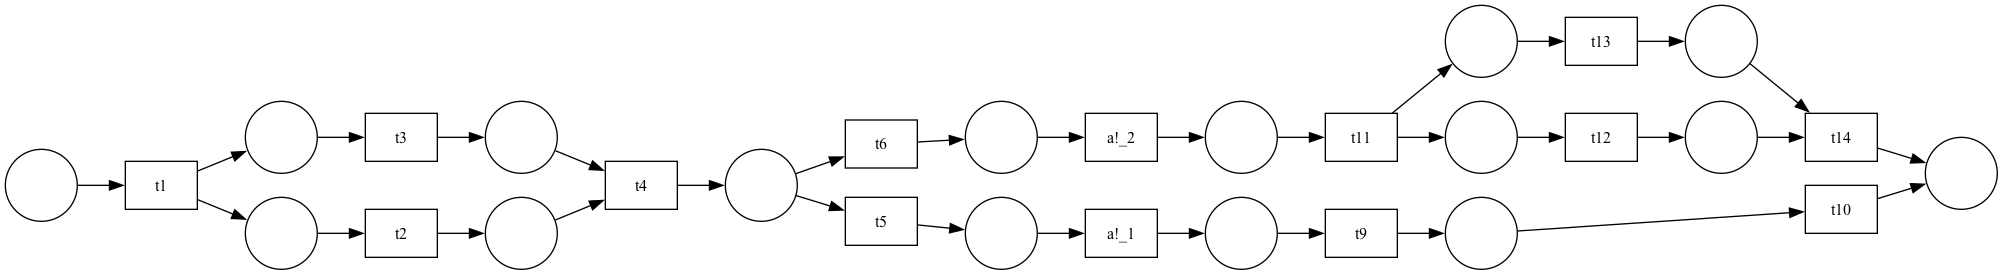

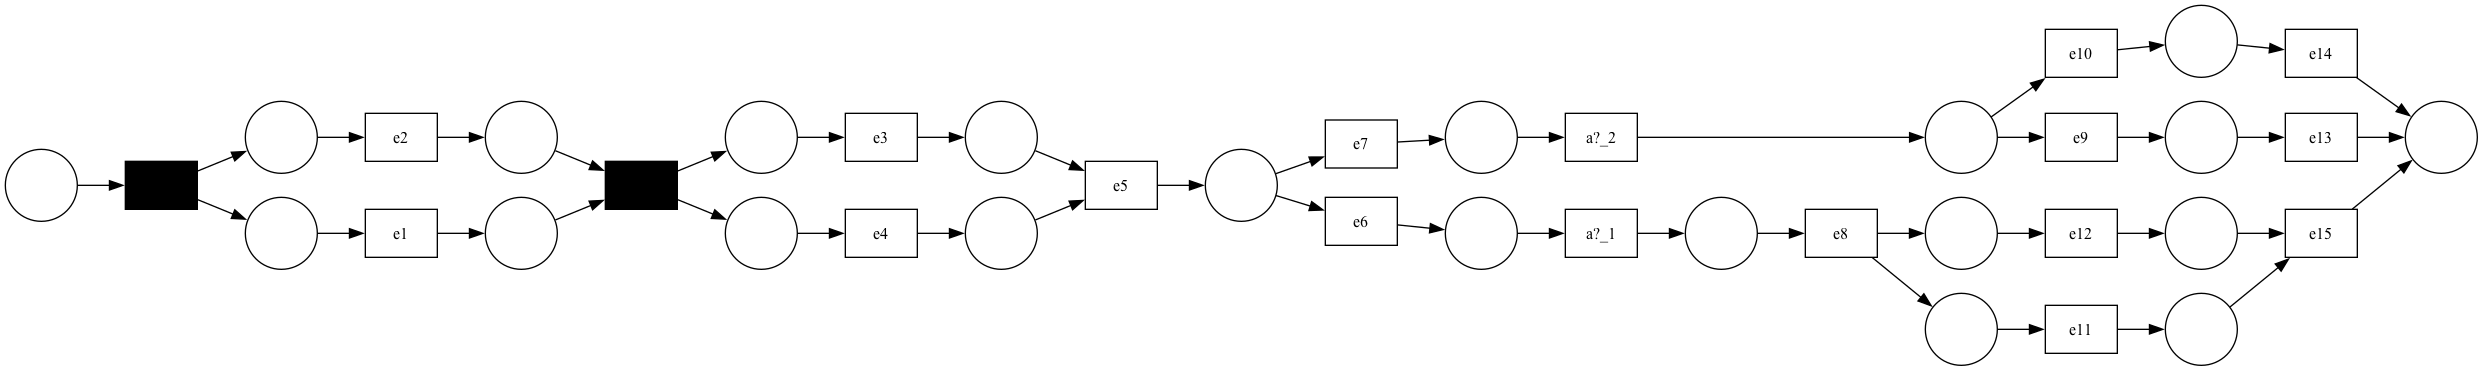

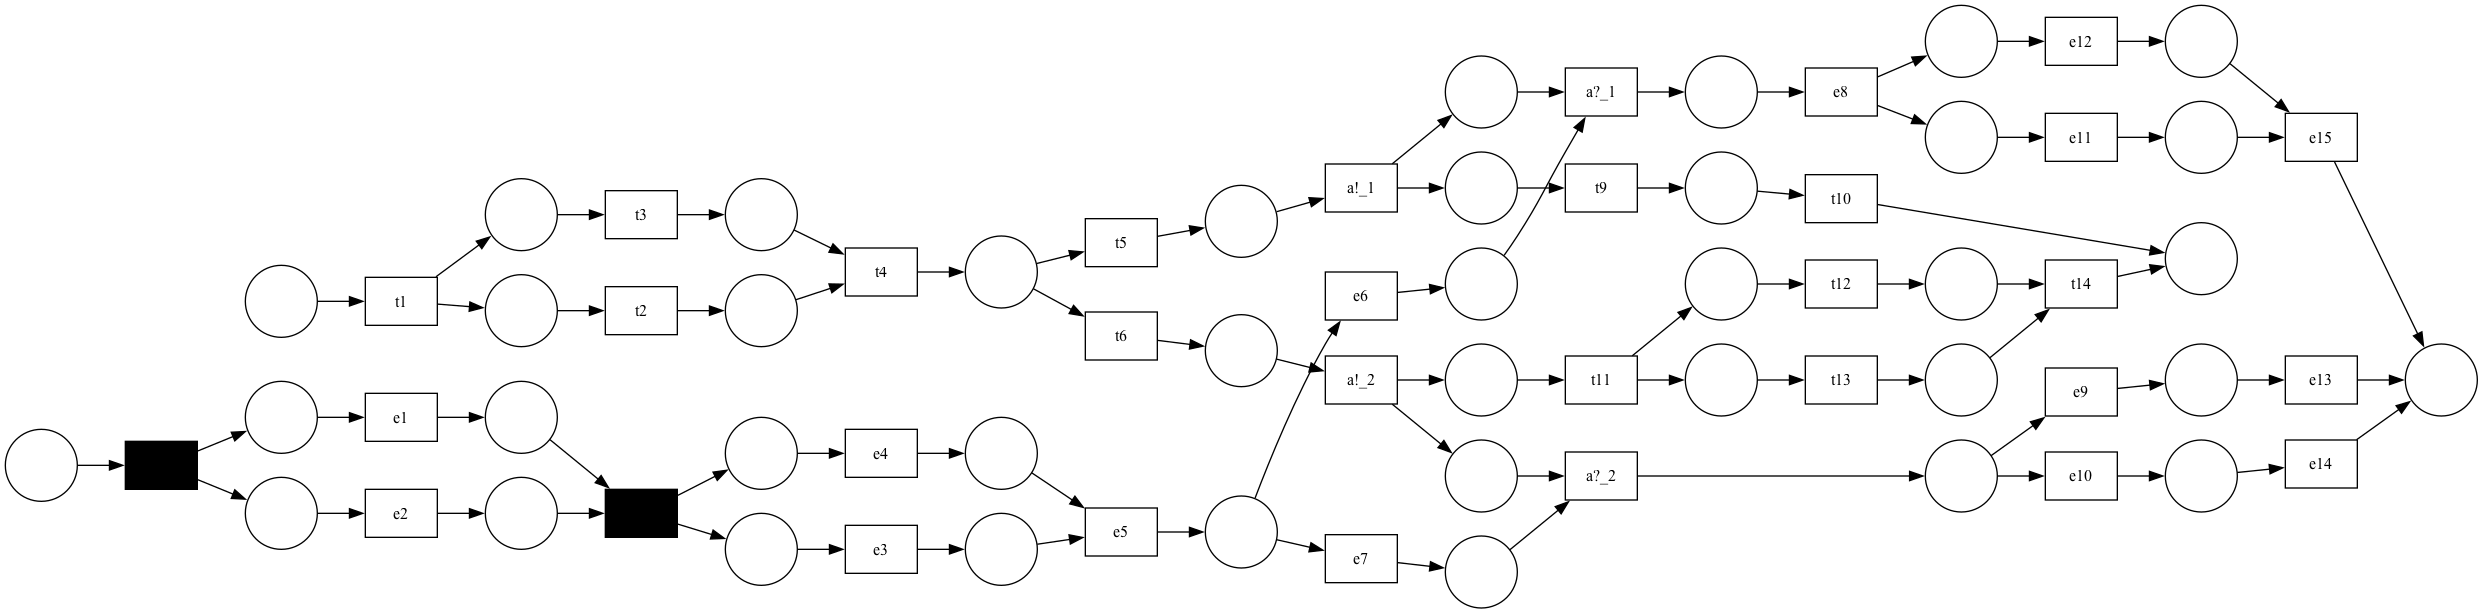

In [3]:

net1, b,b = list_of_nets[0]
net2, b,b = list_of_nets[1]
pm4py.view_petri_net(net1)
pm4py.view_petri_net(net2)

net = InteractionUtils.merge_two_nets(net1, net2)
pm4py.view_petri_net(net)



count:  0


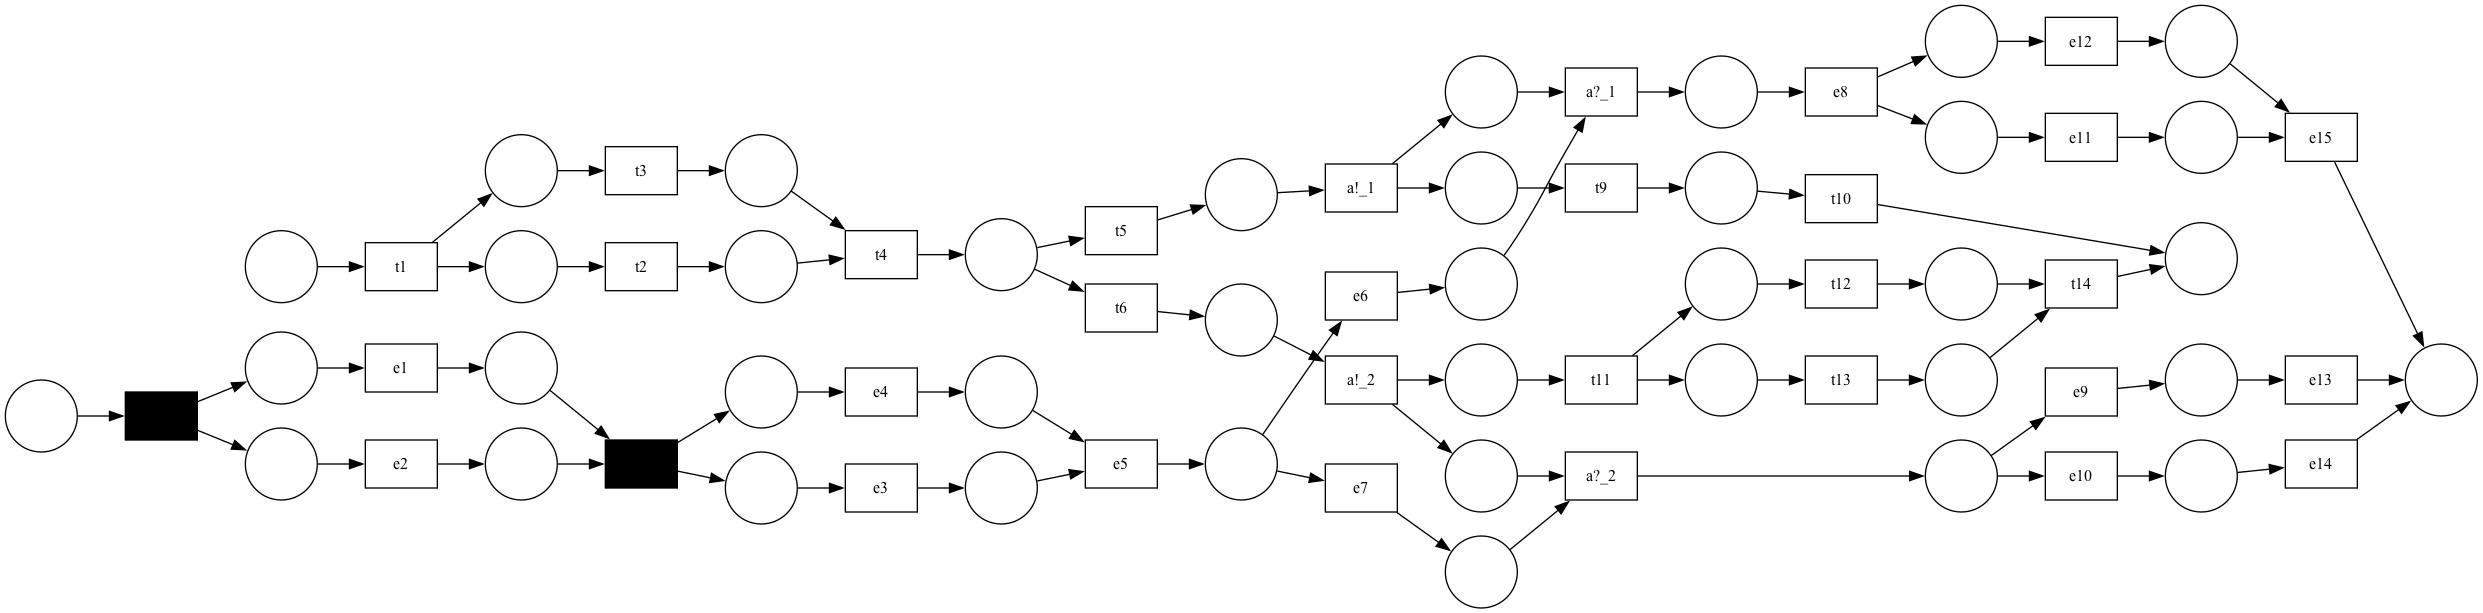

remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
merging place:  ['e15', 'e13', 'e14'] []
Place merged
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge

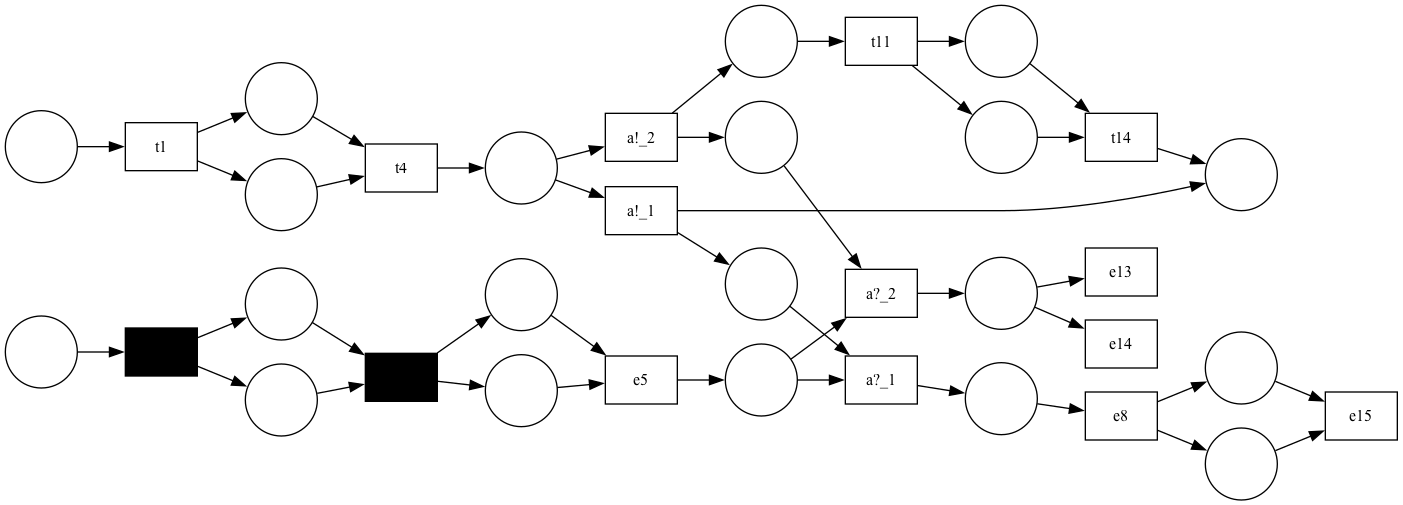

remove place and merge in: 
Place removed
remove place and merge in: 
remove place and merge in: 
Place removed
remove place and merge in: 
remove place and merge in: 
Place removed
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
Place removed
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
Place removed
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove transition in: 
remove transition in: 
remove transition in: 
remove transition in: 
removing transition:  e13 e14
Transition removed
remove transition in: 
remove transition in: 
remove transition in: 
remove transition in: 
remove transition in: 
remove transition in: 
remove transition in: 
None
Local transition removed
t11
Local transition removed
t1
Local transition removed
t14
Local transition removed
e8
Local

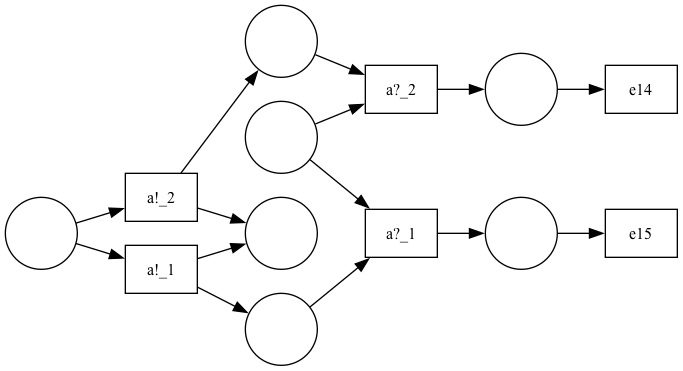

remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove transition in: 
remove transition in: 
count:  3


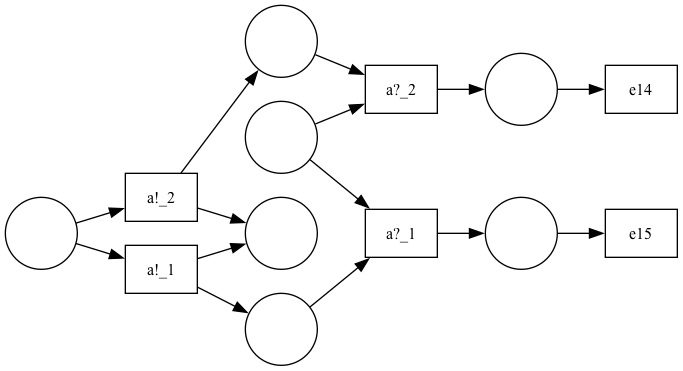

remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove transition in: 
remove transition in: 
count:  4


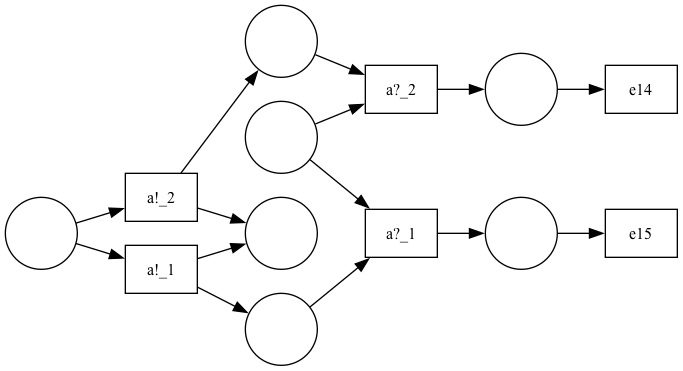

remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove transition in: 
remove transition in: 
count:  5


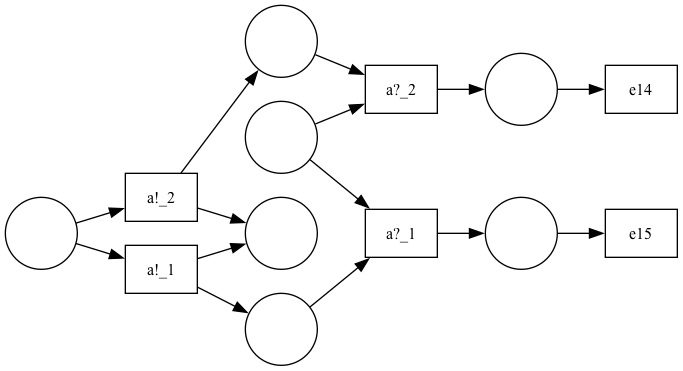

remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove transition in: 
remove transition in: 
count:  6


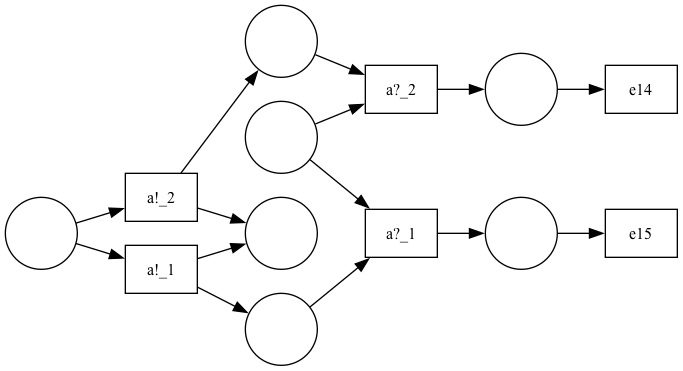

remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove transition in: 
remove transition in: 
count:  7


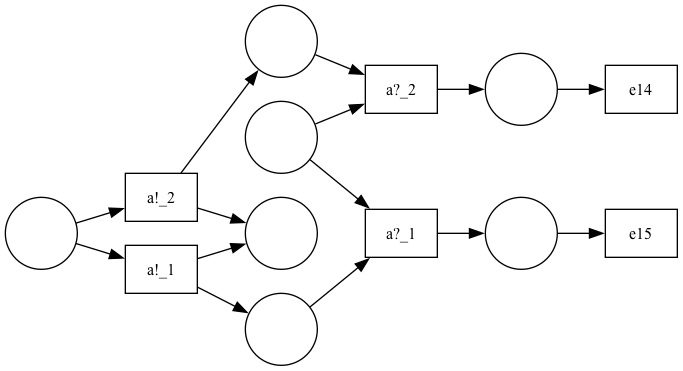

remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove transition in: 
remove transition in: 
count:  8


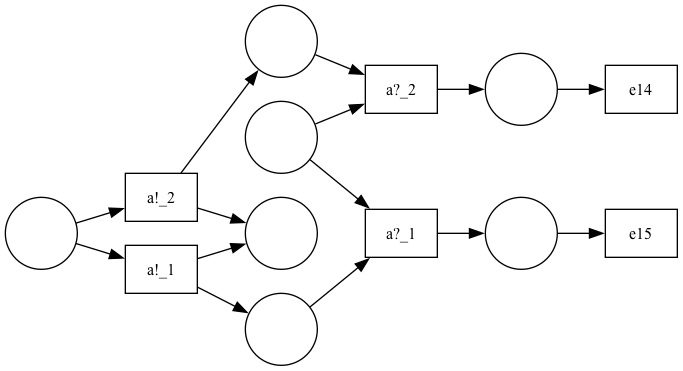

remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove transition in: 
remove transition in: 
count:  9


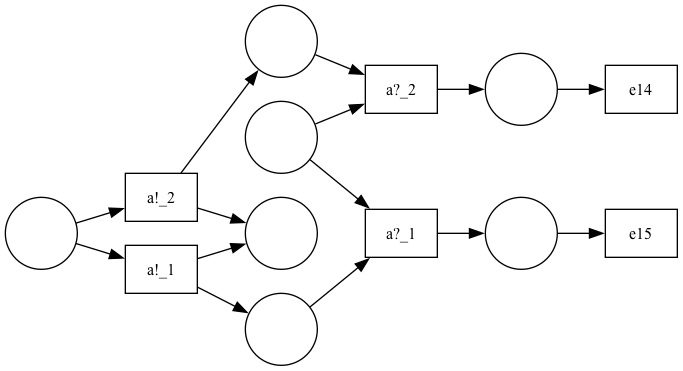

remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove transition in: 
remove transition in: 
count:  10


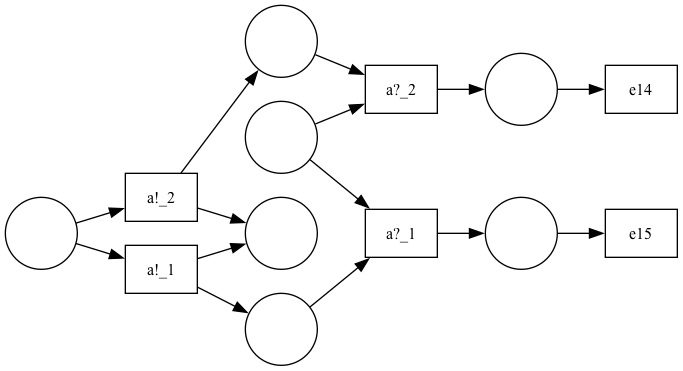

remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove transition in: 
remove transition in: 
count:  11


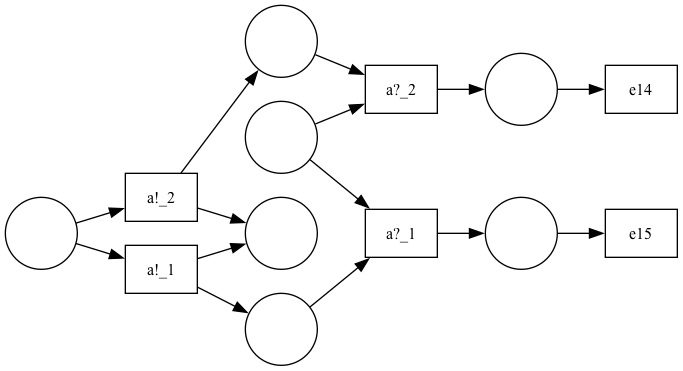

remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove transition in: 
remove transition in: 
count:  12


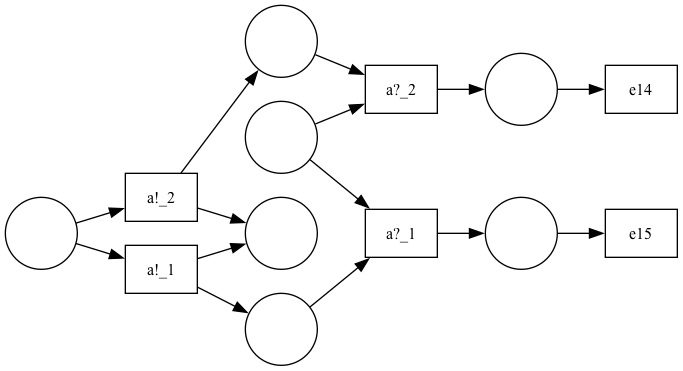

remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove transition in: 
remove transition in: 
count:  13


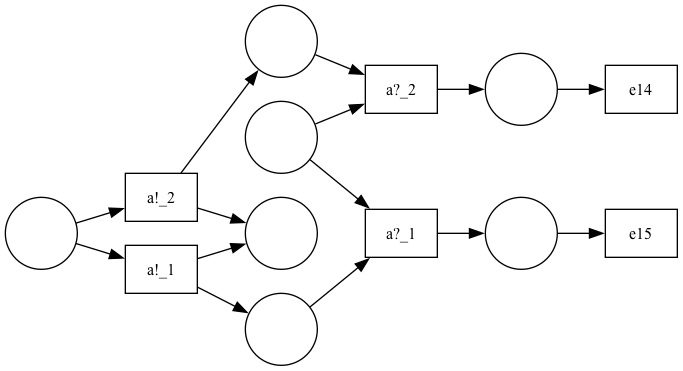

remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove transition in: 
remove transition in: 
count:  14


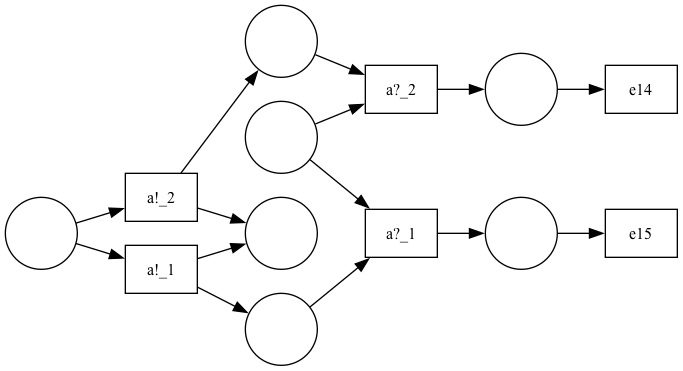

remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove place and merge in: 
remove transition in: 
remove transition in: 


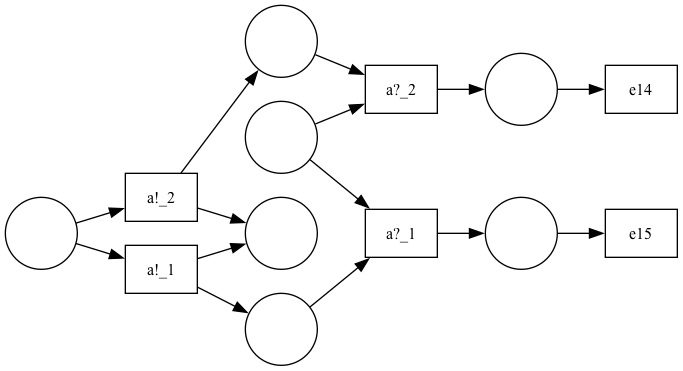

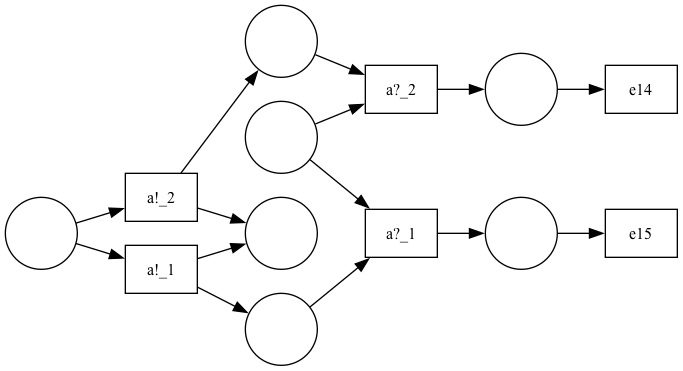

In [4]:

from pm4py import PetriNet
from Reducer import Reducer
from Refiner import Refiner

pnet = net.__deepcopy__()

pnet, changes = Reducer.apply(pnet)
pm4py.view_petri_net(pnet)
#Refiner.reverse_apply(pnet, changes)
pm4py.view_petri_net(pnet)

# def remove_transition(net, transition):
#     #check if current transition has one in on out arc (might not be sufficient todo check)
#     # find a t1
#     for other_trans in net.transitions:
#         if(other_trans != transition and petri_utils.pre_set(transition)== petri_utils.pre_set(other_trans) 
#             and petri_utils.post_set(transition)==petri_utils.post_set(other_trans)):
#             petri_utils.remove_transition(net, transition)
#             print("removing transition: ", transition.label, other_trans.label)
#             return True
#     return False

# count = 0
# pnet = net.__deepcopy__()
# pm4py.view_petri_net(pnet)



# while (count <=10):
#     count += 1
#     for place in pnet.places.copy():
#         if not place.properties.keys().__contains__('sync'):
#             if Reducer.remove_place(pnet, place):
#                 pm4py.view_petri_net(pnet)
#                 print("Place removed")

#     for transition in pnet.transitions.copy():
#         if not transition.properties.keys().__contains__('sync'):
#             if remove_transition(pnet, transition):
#                 pm4py.view_petri_net(pnet)
#                 print("Transition removed")
    
#     for transition in pnet.transitions.copy():
#         if not transition.properties.keys().__contains__('sync'):
#             if Reducer.remove_local_transition(pnet, transition):
#                 pm4py.view_petri_net(pnet)
#                 print("Local transition removed")



